# The simple Problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
plt.ion()

from samples import data_sig, data_back

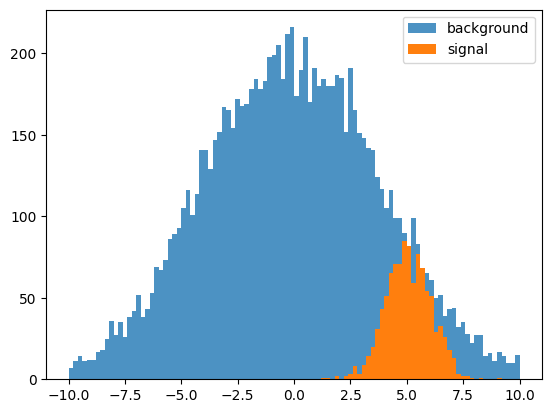

In [7]:
plt.hist(data_back, bins=100, range=(-10.0, 10.0), label='background', alpha=0.8)
plt.hist(data_sig, bins=100, range=(-10.0, 10.0), label='signal', alpha=1.0)
plt.legend()
plt.show()

Next, lets calculate the $S/\sqrt(B)$ for this distribution by scanning.

In [3]:
def sig_sqrt_b(sig, back, cut: float):
    'Calculate the S/sqrt(B) for two 1D numpy arrays with the cut at cut.'

    n_sig = len(sig[sig > cut])
    pass_back = len(back[back > cut])

    return n_sig/math.sqrt(pass_back) 

In [4]:
cut_values = np.linspace(-10.0, 10.0, 100)
s_sqrt_b = np.array([sig_sqrt_b(data_sig, data_back, c) for c in cut_values])

In [5]:
max_index = np.argmax(s_sqrt_b)
print(rf"Max value of $S\sqrt{{B}}$ occurs at {cut_values[max_index]:0.4} and is {s_sqrt_b[max_index]:0.4}.")

Max value of $S\sqrt{B}$ occurs at 3.737 and is 22.44.


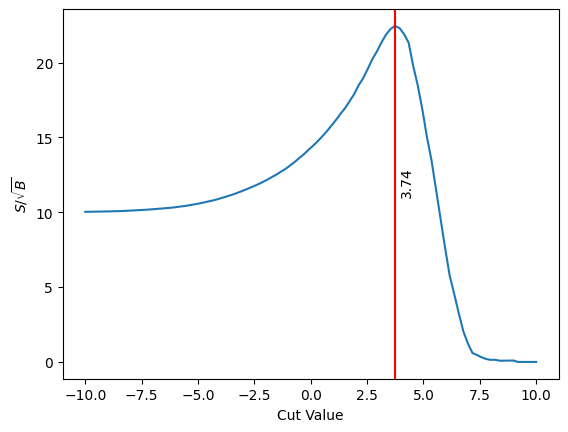

In [6]:
plt.plot(cut_values, s_sqrt_b)
plt.xlabel('Cut Value')
plt.ylabel(r'$S/\sqrt{B}$')
plt.axvline(cut_values[max_index], color='red')
plt.text(cut_values[max_index]+0.2, s_sqrt_b[max_index]/2.0, f'{cut_values[max_index]:0.3}', rotation=90)
plt.show()